In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ielts-success-stories-dataset/IELTS_Success_Stories_Dataset.xlsx


In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_excel('/kaggle/input/ielts-success-stories-dataset/IELTS_Success_Stories_Dataset.xlsx')
print(data.shape)
data.head(2)

(27, 23)


,Candidate,Location,Profession,Study Duration (months),IELTS Score (Overall),Key Strategies,Education Level,Age,Target Country,English Proficiency (Preparation),...,Preferred Learning Resources,Application Status,Job Offer Received,Additional Certifications,Volunteer Experience,Language Fluency,Internship Experience,Relevant Skills,Recommendations,Networking Efforts
0,Aisha,Karachi,Grad Student,3,8.5,"Practice, forums, tutoring",Master's,24,Canada,Advanced,...,"Online courses, study guides",Under Process,No,TESOL,Yes,"Urdu, English",Research Assistant,"Data Analysis, Teaching",Strong,"LinkedIn, Local Events"
1,Ahmed,Lahore,IT Professional,4,7.5,"Balanced schedule, time management, speaking p...",Bachelor's,29,Australia,Intermediate,...,"Online forums, practice tests",Approved,Yes,PMP,No,"Urdu, English",IT Consultant,"Project Management, Programming",Positive,Online Communities


## Perform EDA on the dataset and get insights

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Candidate                          27 non-null     object 
 1   Location                           27 non-null     object 
 2   Profession                         27 non-null     object 
 3   Study Duration (months)            27 non-null     int64  
 4   IELTS Score (Overall)              27 non-null     float64
 5   Key Strategies                     27 non-null     object 
 6   Education Level                    27 non-null     object 
 7   Age                                27 non-null     int64  
 8   Target Country                     27 non-null     object 
 9   English Proficiency (Preparation)  27 non-null     object 
 10  Practice Hours per Week            27 non-null     int64  
 11  Mock Tests Taken                   27 non-null     int64  
 

### Read about the unique values countings of all the features

In [5]:
def valueCounts(col):
    print(f'\n{data[col].value_counts()}\n')

for col in data.columns:
    valueCounts(col)


Candidate
Aisha     2
Ahmed     2
Fatima    2
Ali       2
Saad      2
Nida      2
Bilal     2
Sara      2
Imran     2
Hina      2
Farid     2
Zara      1
Rashid    1
Sana      1
Hasan     1
Zainab    1
Name: count, dtype: int64


Location
Lahore       8
Karachi      7
Islamabad    7
Peshawar     5
Name: count, dtype: int64


Profession
IT Professional      4
Grad Student         2
School Teacher       2
Eng. Student         2
Marketing Manager    2
Finance Analyst      2
Medical Student      2
Software Engineer    2
Journalist           2
Civil Engineer       2
Graphic Designer     1
Educator             1
Environmentalist     1
Architect            1
HR Specialist        1
Name: count, dtype: int64


Study Duration (months)
3    8
4    7
5    5
6    4
2    3
Name: count, dtype: int64


IELTS Score (Overall)
7.500    5
8.250    5
8.500    4
9.000    3
8.000    3
8.750    3
7.875    2
7.000    2
Name: count, dtype: int64


Key Strategies
Practice, forums, tutoring                      

### Remove some features
- `Candidate` because no use of name of students in the success of any organization.
- `Language Fluency` which have just 1 type of entries

In [6]:
data.drop(columns=['Candidate', 'Language Fluency'], axis=1, inplace=True)
data.head(2)

,Location,Profession,Study Duration (months),IELTS Score (Overall),Key Strategies,Education Level,Age,Target Country,English Proficiency (Preparation),Practice Hours per Week,...,Achieved Desired Score,Preferred Learning Resources,Application Status,Job Offer Received,Additional Certifications,Volunteer Experience,Internship Experience,Relevant Skills,Recommendations,Networking Efforts
0,Karachi,Grad Student,3,8.5,"Practice, forums, tutoring",Master's,24,Canada,Advanced,15,...,Yes,"Online courses, study guides",Under Process,No,TESOL,Yes,Research Assistant,"Data Analysis, Teaching",Strong,"LinkedIn, Local Events"
1,Lahore,IT Professional,4,7.5,"Balanced schedule, time management, speaking p...",Bachelor's,29,Australia,Intermediate,10,...,Yes,"Online forums, practice tests",Approved,Yes,PMP,No,IT Consultant,"Project Management, Programming",Positive,Online Communities


In [7]:
data.isnull().sum()

Location                             0
Profession                           0
Study Duration (months)              0
IELTS Score (Overall)                0
Key Strategies                       0
Education Level                      0
Age                                  0
Target Country                       0
English Proficiency (Preparation)    0
Practice Hours per Week              0
Mock Tests Taken                     0
Achieved Desired Score               0
Preferred Learning Resources         0
Application Status                   0
Job Offer Received                   0
Additional Certifications            0
Volunteer Experience                 0
Internship Experience                0
Relevant Skills                      0
Recommendations                      0
Networking Efforts                   0
dtype: int64

## Convert the categorical features into numerical features

In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
objCol = data.select_dtypes(include=['object']).columns

for col in objCol:
    data[col] = encoder.fit_transform(data[col])

In [10]:
data.head(2)

,Location,Profession,Study Duration (months),IELTS Score (Overall),Key Strategies,Education Level,Age,Target Country,English Proficiency (Preparation),Practice Hours per Week,...,Achieved Desired Score,Preferred Learning Resources,Application Status,Job Offer Received,Additional Certifications,Volunteer Experience,Internship Experience,Relevant Skills,Recommendations,Networking Efforts
0,1,6,3,8.5,10,1,24,1,0,15,...,1,11,3,0,15,1,10,5,2,9
1,2,9,4,7.5,0,0,29,0,1,10,...,1,12,0,1,10,0,7,12,1,11


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Location                           27 non-null     int64  
 1   Profession                         27 non-null     int64  
 2   Study Duration (months)            27 non-null     int64  
 3   IELTS Score (Overall)              27 non-null     float64
 4   Key Strategies                     27 non-null     int64  
 5   Education Level                    27 non-null     int64  
 6   Age                                27 non-null     int64  
 7   Target Country                     27 non-null     int64  
 8   English Proficiency (Preparation)  27 non-null     int64  
 9   Practice Hours per Week            27 non-null     int64  
 10  Mock Tests Taken                   27 non-null     int64  
 11  Achieved Desired Score             27 non-null     int64  
 

- Now this dataset contains 20 integer datatype features and 1 float datatype features.

In [12]:
data.describe()

,Location,Profession,Study Duration (months),IELTS Score (Overall),Key Strategies,Education Level,Age,Target Country,English Proficiency (Preparation),Practice Hours per Week,...,Achieved Desired Score,Preferred Learning Resources,Application Status,Job Offer Received,Additional Certifications,Volunteer Experience,Internship Experience,Relevant Skills,Recommendations,Networking Efforts
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,...,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,1.407407,7.666667,3.962963,8.138889,6.777778,0.518519,27.592593,6.666667,0.333333,15.111111,...,0.740741,8.259259,1.666667,0.074074,7.111111,0.518519,7.148148,7.629630,0.888889,8.259259
std,1.083416,4.260733,1.255189,0.580465,4.576977,0.509175,3.249370,4.242641,0.480384,3.576992,...,0.446576,4.604284,1.208941,0.266880,4.585373,0.509175,3.707619,4.170853,0.640513,4.604284
min,0.000000,0.000000,2.000000,7.000000,0.000000,0.000000,22.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,4.500000,3.000000,7.687500,3.000000,0.000000,25.500000,3.000000,0.000000,12.000000,...,0.500000,4.500000,1.000000,0.000000,3.500000,0.000000,4.500000,4.500000,0.500000,4.500000
50%,1.000000,9.000000,4.000000,8.250000,6.000000,1.000000,28.000000,7.000000,0.000000,15.000000,...,1.000000,9.000000,2.000000,0.000000,7.000000,1.000000,8.000000,8.000000,1.000000,9.000000
75%,2.000000,11.000000,5.000000,8.500000,10.500000,1.000000,30.000000,10.500000,1.000000,18.000000,...,1.000000,12.000000,3.000000,0.000000,10.500000,1.000000,10.000000,11.000000,1.000000,12.000000
max,3.000000,14.000000,6.000000,9.000000,15.000000,1.000000,34.000000,13.000000,1.000000,20.000000,...,1.000000,15.000000,3.000000,1.000000,15.000000,1.000000,12.000000,14.000000,2.000000,15.000000


- Let's see the correlation of other features with target feature

In [13]:
target = 'IELTS Score (Overall)'

In [14]:
correlation = data.corr(method='pearson')
correlation[target].sort_values(ascending=False)

IELTS Score (Overall)                1.000000
Practice Hours per Week              0.872168
Mock Tests Taken                     0.839244
Volunteer Experience                 0.788021
Achieved Desired Score               0.700651
Recommendations                      0.534483
Application Status                   0.328849
Profession                           0.108859
Internship Experience                0.106235
Additional Certifications            0.091518
Key Strategies                       0.026541
Preferred Learning Resources        -0.031980
Education Level                     -0.090369
Location                            -0.093436
Age                                 -0.101392
Networking Efforts                  -0.111130
Relevant Skills                     -0.172544
Study Duration (months)             -0.190626
Target Country                      -0.195220
Job Offer Received                  -0.317241
English Proficiency (Preparation)   -0.827586
Name: IELTS Score (Overall), dtype

- Visualize this data graphically

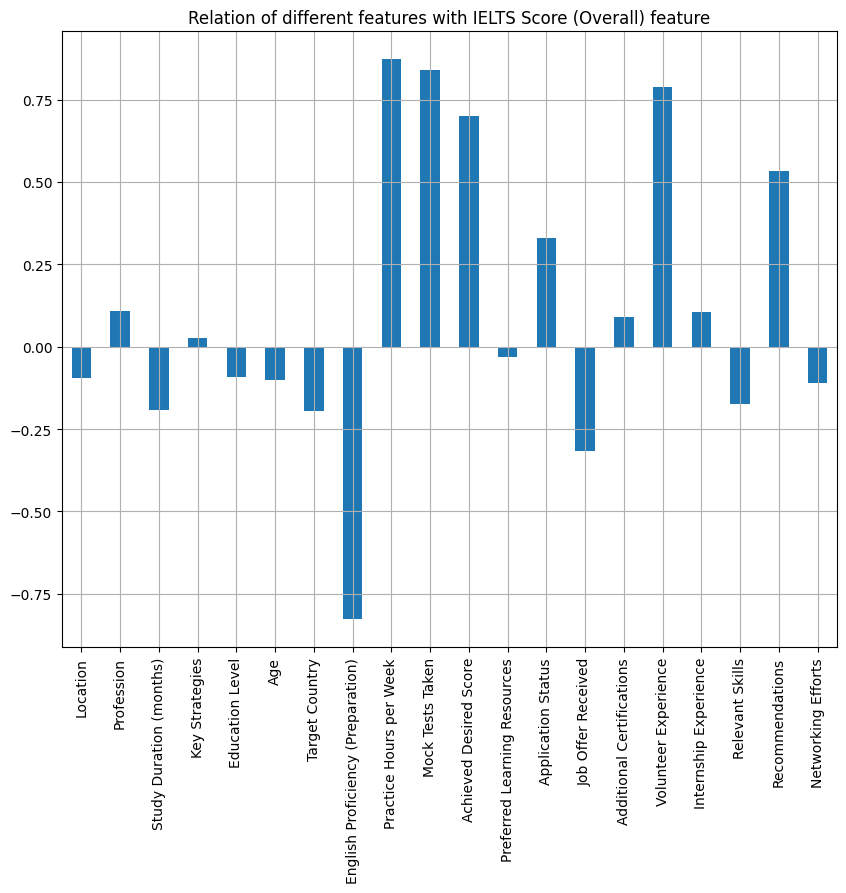

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

data2 = data.drop(columns=[target], axis=1)
data2.corrwith(data[target]).plot.bar(figsize=(10, 8), title=f'Relation of different features with {target} feature', rot=90, grid=True)
plt.savefig('target_correlation.png')
plt.show()

In [ ]:
%matplotlib inline
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')

plt.savefig('correlation_heatmap.png')
plt.show()

## Visualize the different features correspond to target variable

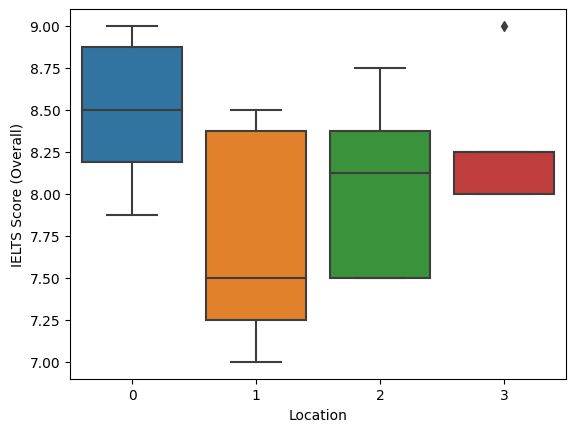

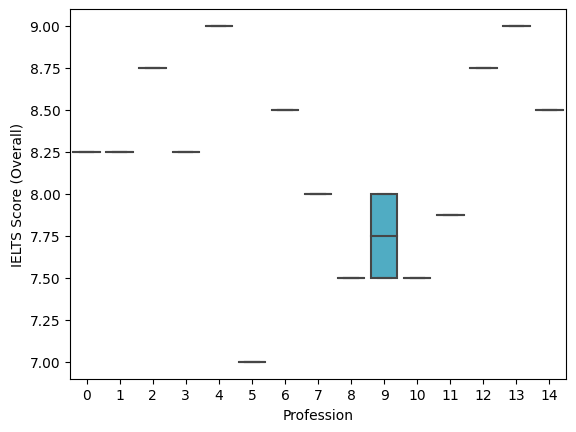

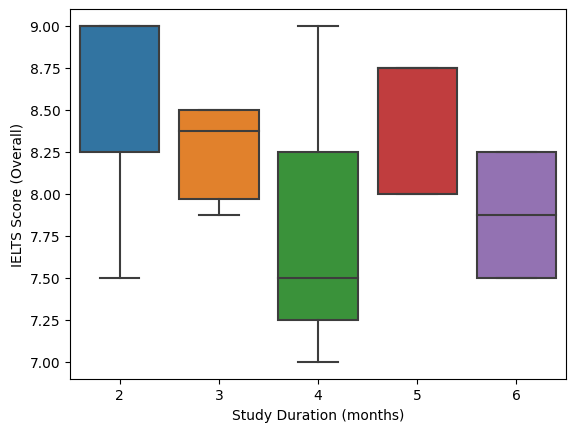

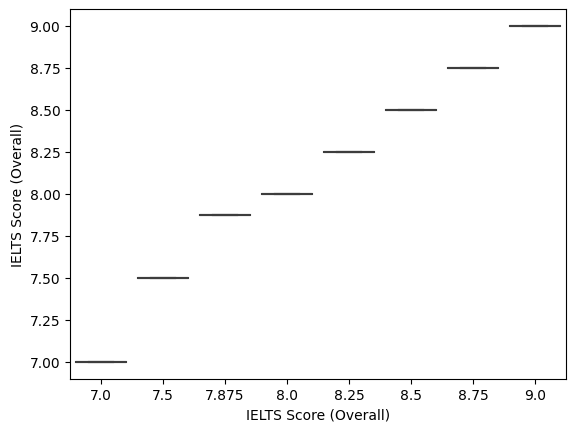

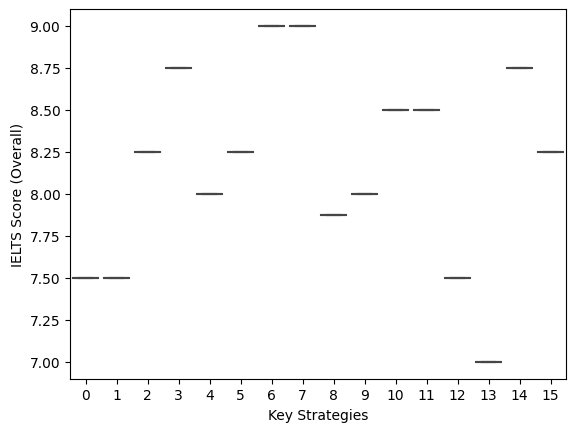

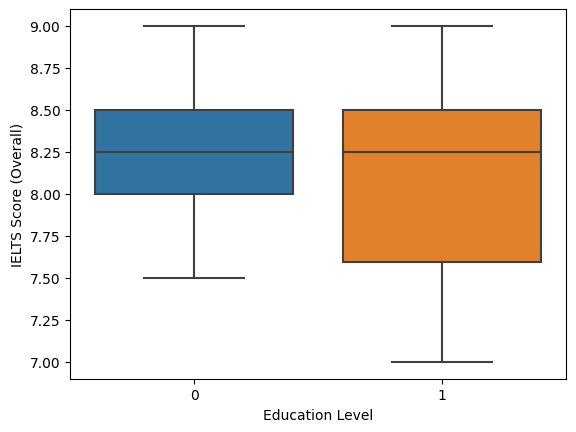

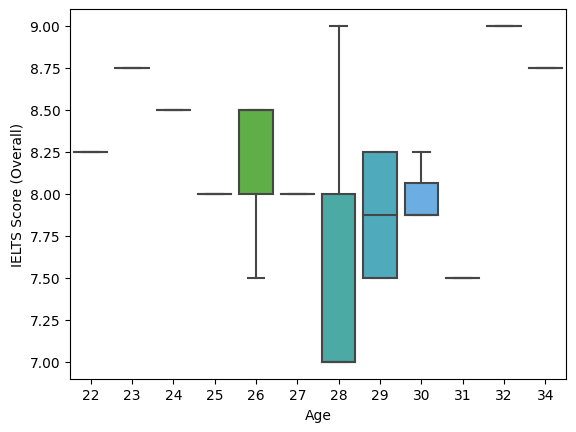

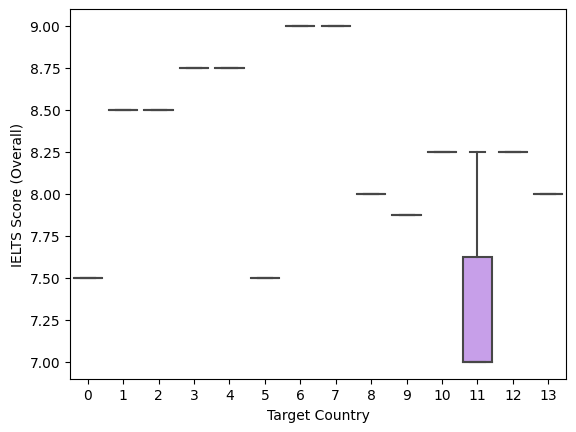

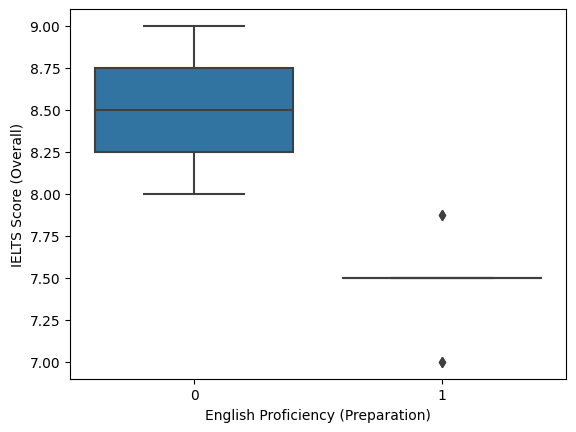

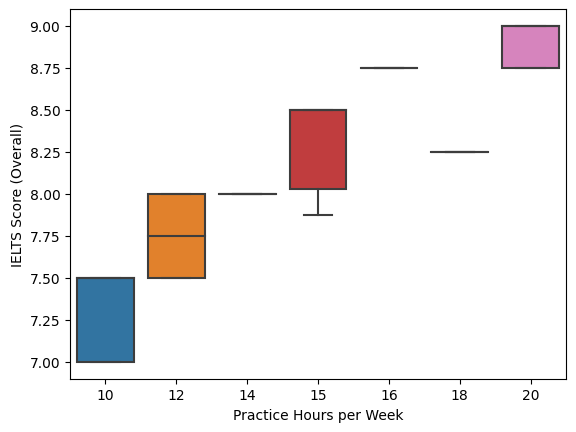

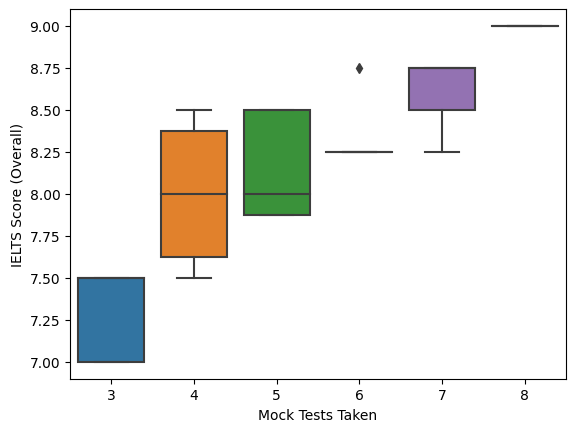

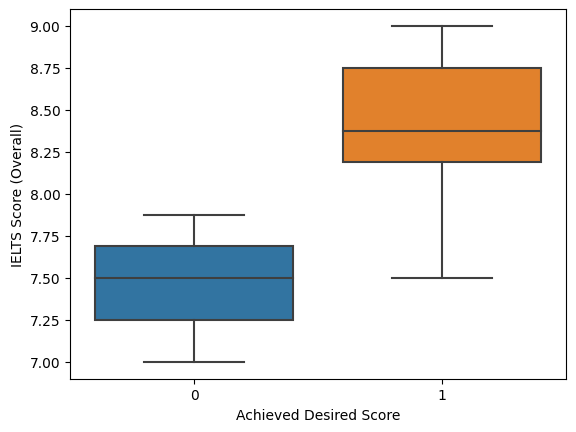

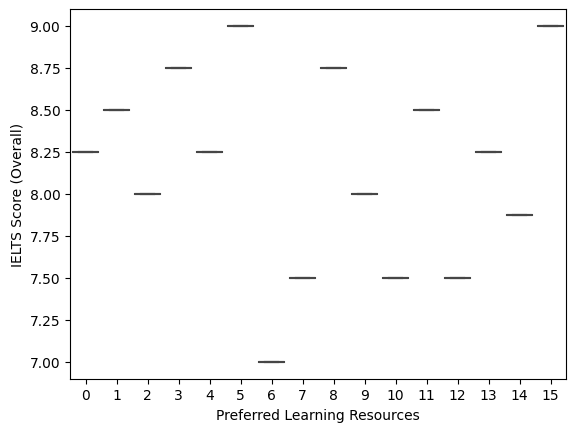

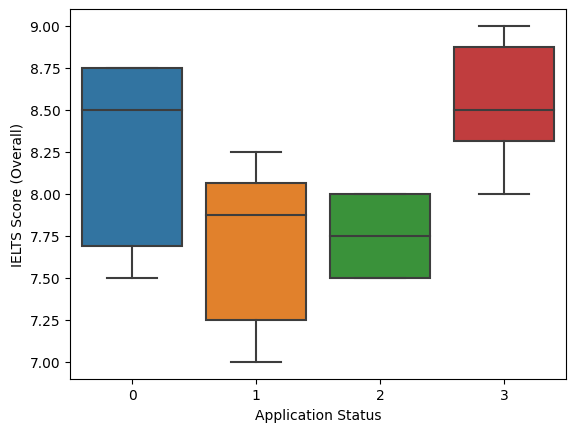

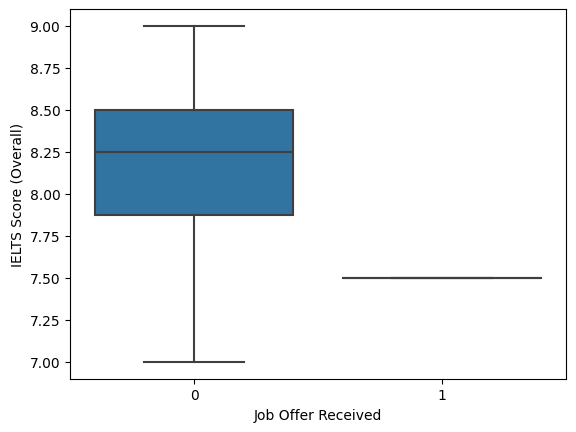

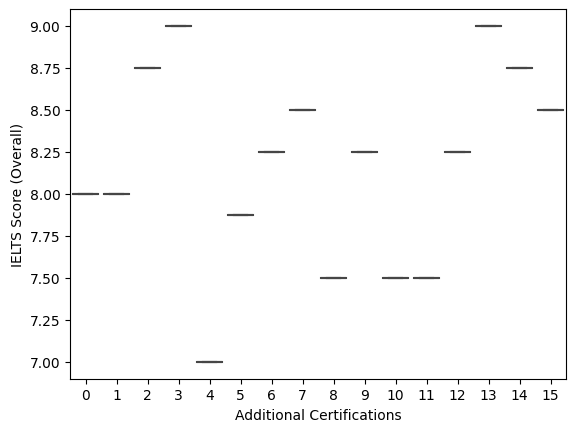

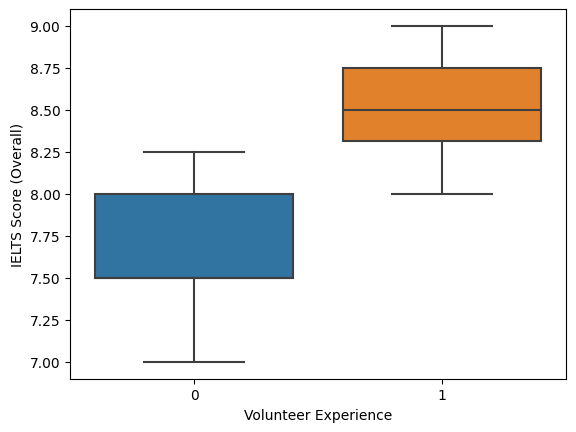

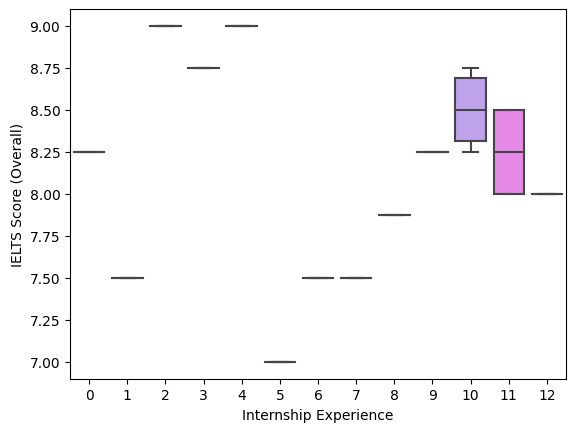

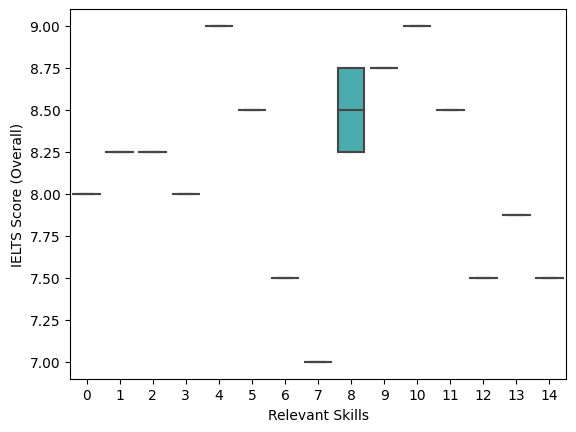

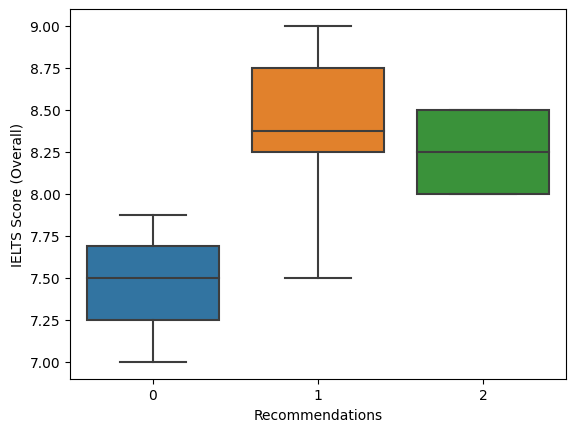

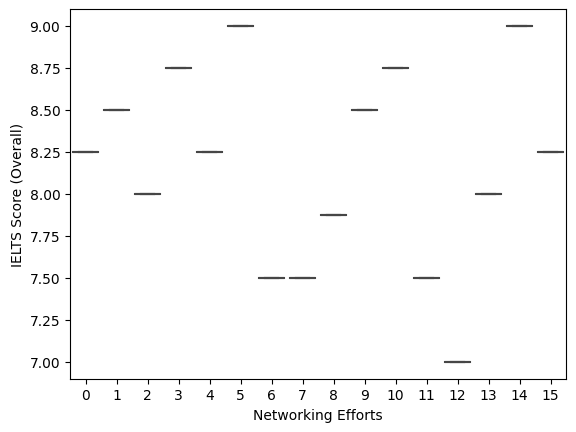

In [30]:
def plot(col):
    sns.boxplot(x=col, y=target, data=data)
    plt.savefig(f'{col}_feature.png')
    plt.show()

for col in data.columns:
    plot(col)

## Start Building and Training of Model

In [34]:
x = data.drop(columns=[target], axis=1)
y = data[target]

print(x.shape)
print(y.shape)

(27, 20)
(27,)


In [35]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

print('Training set:', xtrain.shape, ytrain.shape)
print('Testing set:', xtest.shape, ytest.shape)

Training set: (21, 20) (21,)
Testing set: (6, 20) (6,)


In [36]:
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor


#### Create a DataFrame to store the accuracies of different models

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
results = pd.DataFrame(columns=['Model', 'MSE_train', 'R2_train', 'MSE_test', 'R2_test'])


##### Linear Regression Model

In [38]:
lr = LinearRegression()
lr.fit(xtrain, ytrain)

LinearRegression()

In [39]:
ypred_train = lr.predict(xtrain)
ypred_test = lr.predict(xtest)

mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)

mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

results.loc[len(results)] = ['Linear Regression', mse_train, r2_train, mse_test, r2_test]


##### Ridge Regression Model

In [40]:
ridge = Ridge()
ridge.fit(xtrain, ytrain)

Ridge()

In [41]:
ypred_train = ridge.predict(xtrain)
ypred_test = ridge.predict(xtest)

mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)

mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

results.loc[len(results)] = ['Ridge Regression', mse_train, r2_train, mse_test, r2_test]


#### Elastic Net Regression Model

In [42]:
elastic = ElasticNet()
elastic.fit(xtrain, ytrain)


ElasticNet()

In [43]:
ypred_train = elastic.predict(xtrain)
ypred_test = elastic.predict(xtest)

mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)

mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

results.loc[len(results)] = ['Elastic Net Regression', mse_train, r2_train, mse_test, r2_test]


#### Decision Tree Regression Model

In [44]:
dtr = DecisionTreeRegressor()
dtr.fit(xtrain, ytrain)


DecisionTreeRegressor()

In [45]:
ypred_train = dtr.predict(xtrain)
ypred_test = dtr.predict(xtest)

mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)

mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

results.loc[len(results)] = ['Decision Tree Regression', mse_train, r2_train, mse_test, r2_test]


#### Random Forest Regressor Model

In [46]:
rfr = RandomForestRegressor()
rfr.fit(xtrain, ytrain)


RandomForestRegressor()

In [47]:
ypred_train = rfr.predict(xtrain)
ypred_test = rfr.predict(xtest)

mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)

mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

results.loc[len(results)] = ['Random Forest Regression', mse_train, r2_train, mse_test, r2_test]


#### XG Boost Regressor Model

In [48]:
xgb = XGBRegressor()
xgb.fit(xtrain, ytrain)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [49]:
ypred_train = xgb.predict(xtrain)
ypred_test = xgb.predict(xtest)

mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)

mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

results.loc[len(results)] = ['XG Boost Regression', mse_train, r2_train, mse_test, r2_test]


#### KNN Regression Model

In [52]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(xtrain, ytrain)


KNeighborsRegressor()

In [53]:
ypred_train = knn.predict(xtrain)
ypred_test = knn.predict(xtest)

mse_train = mean_squared_error(ytrain, ypred_train)
r2_train = r2_score(ytrain, ypred_train)

mse_test = mean_squared_error(ytest, ypred_test)
r2_test = r2_score(ytest, ypred_test)

results.loc[len(results)] = ['KNN Regression', mse_train, r2_train, mse_test, r2_test]


### Let's see the accuracies of different models in the increasing order of 'Testing MSE'

In [54]:
results = results.sort_values(by='MSE_test', ascending=True)
results


,Model,MSE_train,R2_train,MSE_test,R2_test
4,Random Forest Regression,7.790327e-03,0.976996,0.015086,0.925728
5,XG Boost Regression,1.422946e-07,1.000000,0.016455,0.918990
3,Decision Tree Regression,0.000000e+00,1.000000,0.020833,0.897436
1,Ridge Regression,6.444433e-04,0.998097,0.072341,0.643857
2,Elastic Net Regression,9.246131e-02,0.726969,0.133491,0.342813
0,Linear Regression,4.132129e-30,1.000000,0.154003,0.241830
6,KNN Regression,1.005357e-01,0.703126,0.168333,0.171282


- From the above data, MSE and R2 Score is best fit for `Random Forest Regression Model` and somewhat fit for `XG Boost Regression Model`.